<a href="https://colab.research.google.com/github/baharbhz76/MastersThesis_WeedDetection_RGB-NIR/blob/main/G%2BNIR%2BNDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import os

# Define paths to the directories
rgb_dir = '/content/drive/MyDrive/train images'
nir_dir = '/content/drive/MyDrive/train NIR'
rgb_annotations_dir = '/content/drive/MyDrive/train annotations'
output_dir = '/content/drive/MyDrive/combined_images_GNIRNDVI'
output_annotations_dir = '/content/drive/MyDrive/combined_annotations_v1'
def apply_bilateral_filter(image, d=9, sigmaColor=75, sigmaSpace=75):
  return cv2.bilateralFilter(image, d, sigmaColor, sigmaSpace)
  """
    Apply Gaussian bilateral filter to preserve edges.
    """

# Ensure output directories exist
os.makedirs(output_dir, exist_ok=True)
os.makedirs(output_annotations_dir, exist_ok=True)
def calculate_ndvi(rgb_image, nir_image):
    # Calculate NDVI using the red (rgb_image[:, :, 2]) and NIR channels
    red = rgb_image[:, :, 0].astype(float)
    nir = nir_image.astype(float)
    ndvi = (nir - red) / (nir + red + 1e-10)
    ndvi_scaled = ((ndvi + 1) / 2 * 255).astype(np.uint8)  # Scale NDVI to 0-255
    return ndvi_scaled

def combine_channels(green_channel, nir_channel, ndvi_channel):
    # Stack the channels to form a 3-channel image
    combined_image = np.stack((green_channel, nir_channel, ndvi_channel), axis=-1)
    return combined_image

def get_matching_files(rgb_dir, nir_dir, annotations_dir):
    rgb_files = {file: os.path.join(rgb_dir, file) for file in os.listdir(rgb_dir)}
    nir_files = {file: os.path.join(nir_dir, file) for file in os.listdir(nir_dir)}
    annotations_files = {file: os.path.join(annotations_dir, file) for file in os.listdir(annotations_dir)}

    common_files = set(rgb_files).intersection(set(nir_files)).intersection(set(annotations_files))
    return [rgb_files[file] for file in common_files], [nir_files[file] for file in common_files], [annotations_files[file] for file in common_files]

matched_rgb_files, matched_nir_files, matched_annotations_files = get_matching_files(rgb_dir, nir_dir, rgb_annotations_dir)

for rgb_path, nir_path, annotation_path in zip(matched_rgb_files, matched_nir_files, matched_annotations_files):
    file_name = os.path.basename(rgb_path)
    combined_image_path = os.path.join(output_dir, f"combined_{file_name}")
    combined_annotation_path = os.path.join(output_annotations_dir, file_name)

    rgb_img = cv2.imread(rgb_path, cv2.IMREAD_COLOR)
    nir_img = cv2.imread(nir_path, cv2.IMREAD_GRAYSCALE)
    if nir_img is not None:
      nir_img = apply_bilateral_filter(nir_img, d=9, sigmaColor=75, sigmaSpace=75)

    if rgb_img is None or nir_img is None:
        print(f"Failed to load images for {file_name}, skipping...")
        continue

    green_channel = rgb_img[:, :, 1]  # Extract the Green channel
    ndvi_channel = calculate_ndvi(rgb_img, nir_img)
    combined_img = combine_channels(green_channel, nir_img, ndvi_channel)

    cv2.imwrite(combined_image_path, combined_img)

    annotation_img = cv2.imread(annotation_path, cv2.IMREAD_UNCHANGED)
    if annotation_img is None:
        print(f"Failed to load annotation for {file_name}, skipping...")
        continue

    cv2.imwrite(combined_annotation_path, annotation_img)

    print(f"Processed and saved data for {file_name}")

Processed and saved data for jesi_05_18__0_4min_rid_frame73.png
Processed and saved data for jesi_05_18__0_4min_rid_frame47.png
Processed and saved data for jesi_05_18__8_12min_rid_frame251.png
Processed and saved data for jesi_05_18__8_12min_rid_frame32.png
Processed and saved data for jesi_05_12__4_8min_rid_frame267.png
Processed and saved data for jesi_05_12__8_12min_rid_frame49.png
Processed and saved data for jesi_05_12__0_4min_rid_frame181.png
Processed and saved data for jesi_05_12__8_12min_rid_frame194.png
Processed and saved data for jesi_05_12__0_4min_rid_frame50.png
Processed and saved data for jesi_05_12__0_4min_rid_frame37.png
Processed and saved data for jesi_05_12__8_12min_rid_frame147.png
Processed and saved data for jesi_05_18__8_12min_rid_frame159.png
Processed and saved data for jesi_05_12__8_12min_rid_frame224.png
Processed and saved data for jesi_05_12__0_4min_rid_frame105.png
Processed and saved data for jesi_05_12__0_4min_rid_frame142.png
Processed and saved data

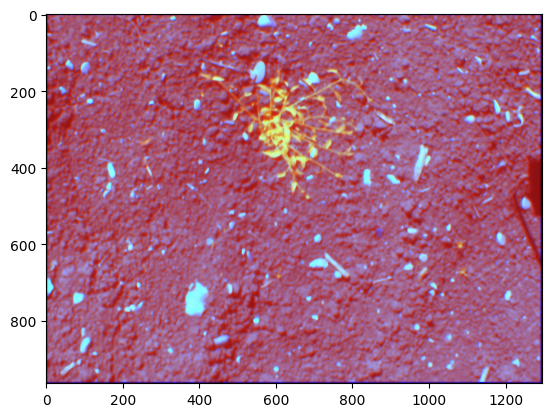

In [ ]:
 # Load and display the combined image
import matplotlib.pyplot as plt
loaded_img = cv2.imread(combined_image_path)
loaded_img = cv2.cvtColor(loaded_img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for visualization
plt.imshow(loaded_img)
plt.show()

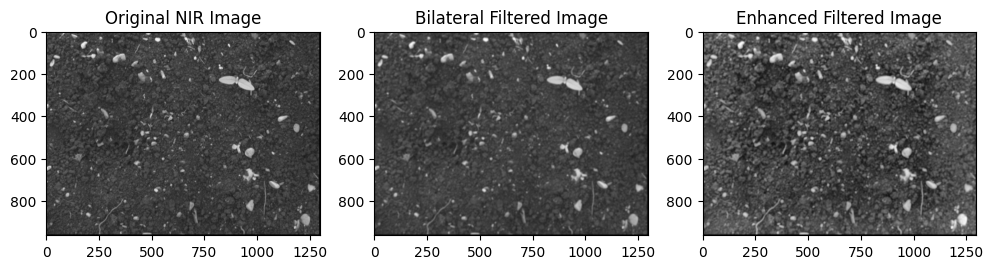

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_bilateral_filter(image, d=9, sigmaColor=75, sigmaSpace=75):

    """
    Apply Gaussian bilateral filter to preserve edges.
    d: Diameter of each pixel neighborhood.
    sigmaColor: Filter sigma in the color space.
    sigmaSpace: Filter sigma in the coordinate space.
    """
    return cv2.bilateralFilter(image, d, sigmaColor, sigmaSpace)

def enhance_contrast(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    """
    Enhance contrast using CLAHE (Contrast Limited Adaptive Histogram Equalization)
    """
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    return clahe.apply(image)

# Load the NIR image
nir_image = cv2.imread('/content/drive/MyDrive/train NIR/jesi_05_12__0_4min_rid_frame104.png', cv2.IMREAD_GRAYSCALE)
if nir_image is not None:
    # Apply the bilateral filter
    filtered_image = apply_bilateral_filter(nir_image, d=9, sigmaColor=75, sigmaSpace=75)

    # Enhance contrast
    enhanced_image = enhance_contrast(filtered_image)

    # Displaying the images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(nir_image, cmap='gray')
    plt.title('Original NIR Image')
    plt.subplot(1, 3, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Bilateral Filtered Image')
    plt.subplot(1, 3, 3)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title('Enhanced Filtered Image')
    plt.show()
else:
    print("Failed to load the NIR image.")




The NDVI (Normalized Difference Vegetation Index) is commonly used to assess the health and density of vegetation by calculating the difference between near-infrared (NIR) and visible red light reflectance. NDVI values range from -1 to +1:

Values close to +1 typically indicate high vegetation density and health.
Values close to 0 or negative are indicative of non-vegetative surfaces, such as water, barren areas, or built-up zones.
The choice of a threshold around 0.5 for enhancing the discrimination of weed areas is strategic based on the typical properties of NDVI in representing vegetation:
In agricultural settings, distinguishing between crops and weeds can be challenging because both are living vegetation and might have similar NDVI signatures. Setting thresholds around 0.5 allows you to potentially differentiate between less vigorous or unhealthy weeds and the more robust crop vegetation.
he area around 0.5 is a critical point because it often represents a transition from non-vegetative to vegetative states in NDVI readings, making it an effective leverage point for discriminating between different types of vegetation, such as crops and weeds.

In [ ]:
import os
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from scipy.ndimage import gaussian_laplace

class CombinedDataset(Dataset):
    def __init__(self, combined_image_dir, annotation_dir, use_ndvi=True, ndvi_threshold=0.45):
        self.combined_image_dir = combined_image_dir
        self.annotation_dir = annotation_dir
        self.use_ndvi = use_ndvi
        self.ndvi_threshold = ndvi_threshold
        self.image_mask_pairs = self._find_matching_files()

        # Normalization for the new channel configuration
        self.transforms = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.456, 0.45, 0.45], std=[0.224, 0.225, 0.225])
        ])

    def __len__(self):
        return len(self.image_mask_pairs)

    def __getitem__(self, idx):
        img_path, mask_path = self.image_mask_pairs[idx]
        rgb_img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        nir_img = cv2.imread(img_path.replace("RGB", "NIR"), cv2.IMREAD_GRAYSCALE)  # Assuming NIR image has same name but different folder or suffix

        if rgb_img is None or nir_img is None:
            raise FileNotFoundError("One of the images was not found.")
        # Apply Scharr filter to NIR image
        # nir_scharr = apply_scharr_filter(nir_img)
        # Apply LoG filter to NIR image
        # nir_log = apply_log_filter(nir_img)


        # Calculate NDVI
        ndvi_channel = self.calculate_ndvi(rgb_img, nir_img)

        # Combine G channel, NIR and NDVI into a single 3-channel image
        green_channel = rgb_img[:, :, 1]  # G channel
        combined_img = self.combine_channels(green_channel, nir_img, ndvi_channel)

        # Convert mask
        mask_rgb = cv2.imread(mask_path, cv2.IMREAD_COLOR)
        mask = self.convert_rgb_to_labels(mask_rgb)

        # Transform
        img_tensor = self.transforms(combined_img)
        mask_tensor = torch.from_numpy(mask).long()

        return img_tensor, mask_tensor

    def calculate_ndvi(self, rgb_image, nir_image):
        red = rgb_image[:, :, 0].astype(float)
        nir = nir_image.astype(float)
        ndvi = (nir - red) / (nir + red + 1e-10)
        ndvi_scaled =((ndvi + 1) / 2 * 255).astype(np.uint8)  # Scale NDVI to 0-255
        ndvi_thresholded = (ndvi_scaled > self.ndvi_threshold * 255).astype(np.uint8) * 255
        return ndvi_thresholded




    def combine_channels(self, green_channel, nir_channel, ndvi_channel):
        return np.stack((green_channel, nir_channel, ndvi_channel), axis=-1)

    def _find_matching_files(self):
        image_mask_pairs = []
        image_files = os.listdir(self.combined_image_dir)
        for img_file in image_files:
            mask_filename = img_file.replace("combined_", "")
            img_path = os.path.join(self.combined_image_dir, img_file)
            mask_path = os.path.join(self.annotation_dir, mask_filename)
            if os.path.exists(mask_path):
                image_mask_pairs.append((img_path, mask_path))
        return image_mask_pairs

    def convert_rgb_to_labels(self, mask_rgb):
        mask = np.zeros((mask_rgb.shape[0], mask_rgb.shape[1]), dtype=np.uint8)
        mask[np.all(mask_rgb == [0, 0, 0], axis=-1)] = 0  # Soil
        mask[np.all(mask_rgb == [0, 255, 0], axis=-1)] = 1  # Crop
        mask[np.all(mask_rgb == [0, 0, 255], axis=-1)] = 2  # Weeds
        return mask

# Example usage:
combined_image_dir = '/content/drive/MyDrive/combined_images_GNIRNDVI'
annotation_dir = '/content/drive/MyDrive/combined_annotations_v1'
dataset = CombinedDataset(combined_image_dir, annotation_dir)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

for images, masks in loader:
    print("Batch images shape:", images.shape)
    print("Batch masks shape:", masks.shape)



Batch images shape: torch.Size([4, 3, 964, 1296])
Batch masks shape: torch.Size([4, 964, 1296])
Batch images shape: torch.Size([4, 3, 964, 1296])
Batch masks shape: torch.Size([4, 964, 1296])
Batch images shape: torch.Size([4, 3, 964, 1296])
Batch masks shape: torch.Size([4, 964, 1296])
Batch images shape: torch.Size([4, 3, 964, 1296])
Batch masks shape: torch.Size([4, 964, 1296])
Batch images shape: torch.Size([4, 3, 964, 1296])
Batch masks shape: torch.Size([4, 964, 1296])
Batch images shape: torch.Size([4, 3, 964, 1296])
Batch masks shape: torch.Size([4, 964, 1296])
Batch images shape: torch.Size([4, 3, 964, 1296])
Batch masks shape: torch.Size([4, 964, 1296])
Batch images shape: torch.Size([4, 3, 964, 1296])
Batch masks shape: torch.Size([4, 964, 1296])
Batch images shape: torch.Size([4, 3, 964, 1296])
Batch masks shape: torch.Size([4, 964, 1296])
Batch images shape: torch.Size([4, 3, 964, 1296])
Batch masks shape: torch.Size([4, 964, 1296])
Batch images shape: torch.Size([4, 3, 96

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

def crop(encoder_layer, decoder_layer):
    if encoder_layer.size()[2] != decoder_layer.size()[2] or encoder_layer.size()[3] != decoder_layer.size()[3]:
        encoder_layer = F.interpolate(encoder_layer, size=(decoder_layer.size()[2], decoder_layer.size()[3]), mode='bilinear', align_corners=True)
    return encoder_layer

class ResNetUNet(nn.Module):
    def __init__(self, n_classes, n_channels=3, pretrained=True):  # Changed n_channels to 3
        super(ResNetUNet, self).__init__()
        self.resnet = models.resnet50(pretrained=pretrained)
        self.resnet.conv1 = nn.Conv2d(n_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)  # Changed n_channels to 3
        self.encoder1 = self.resnet.layer1
        self.encoder2 = self.resnet.layer2
        self.encoder3 = self.resnet.layer3
        self.encoder4 = self.resnet.layer4
        self.decoder4 = nn.ConvTranspose2d(2048, 1024, kernel_size=2, stride=2)
        self.decoder3 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.decoder2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.decoder1 = nn.ConvTranspose2d(256, 64, kernel_size=2, stride=2)
        self.final_conv = nn.Conv2d(64, n_classes, kernel_size=1)

    def forward(self, x):
        x1 = self.resnet.conv1(x)
        x1 = self.resnet.bn1(x1)
        x1 = self.resnet.relu(x1)
        x1 = self.resnet.maxpool(x1)
        e1 = self.encoder1(x1)
        e2 = self.encoder2(e1)
        e3 = self.encoder3(e2)
        e4 = self.encoder4(e3)
        d4 = self.decoder4(e4) + crop(e3, self.decoder4(e4))
        d3 = self.decoder3(d4) + crop(e2, self.decoder3(d4))
        d2 = self.decoder2(d3) + crop(e1, self.decoder2(d3))
        d1 = self.decoder1(d2)
        out = self.final_conv(d1)
        out = F.interpolate(out, size=(964, 1296), mode='bilinear', align_corners=True)  # Resize to match input
        return out


Dice Loss is particularly effective for unbalanced segmentation tasks because it directly tries to optimize the overlap between the predicted and true mask, making it a good choice for datasets where some classes are much less frequent.
Combining Dice Loss with Cross-Entropy allows the model to learn from the pixel-wise classification accuracy (Cross-Entropy) while also optimizing for the overlap in the predicted segmentation masks (Dice), providing a more robust training process.

In [ ]:
import torch.nn as nn
class CombinedLoss(nn.Module):
    def __init__(self):
        super(CombinedLoss, self).__init__()
        self.cross_entropy = nn.CrossEntropyLoss()
        self.dice_loss = DiceLoss()

    def forward(self, inputs, targets):
        ce_loss = self.cross_entropy(inputs, targets)
        dl_loss = self.dice_loss(inputs, targets)
        return ce_loss + dl_loss

class DiceLoss(nn.Module):
    def forward(self, inputs, targets, smooth=1):
        inputs = F.softmax(inputs, dim=1)
        targets = F.one_hot(targets, num_classes=inputs.shape[1]).permute(0, 3, 1, 2).float()

        intersection = (inputs * targets).sum(dim=(2,3))
        dice = (2.*intersection + smooth) / (inputs.sum(dim=(2,3)) + targets.sum(dim=(2,3)) + smooth)

        return 1 - dice.mean()

In [ ]:
def iou_per_class(outputs, labels, n_classes):
    # Convert outputs to class predictions
    _, predictions = torch.max(outputs, 1)
    ious = []
    for cls in range(n_classes):
        prediction = (predictions == cls)
        truth = (labels == cls)
        intersection = torch.logical_and(prediction, truth).sum().item()
        union = torch.logical_or(prediction, truth).sum().item()
        if union == 0:
            iou = float('nan')  # or some other placeholder for no prediction
        else:
            iou = intersection / union
        ious.append(iou)
    return ious

In [ ]:
from torch.utils.data.dataset import random_split
torch.manual_seed(0)

# Assuming the total dataset size and test size are known
total_size = len(dataset)
test_size = 64
train_size = total_size - test_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [ ]:
# Set environment variable for memory allocation
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

# Clear any cached memory (optional, often has no effect)
torch.cuda.empty_cache()

In [ ]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
import gc
# Assuming UNet, CombinedLoss, and iou are defined



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize your UNet model with 4 input channels and 3 classes for output

model = ResNetUNet(n_classes=3, n_channels=3, pretrained=True).to(device)
# model = CustomDeepLabV3(num_classes=3, in_channels=3).to(device)  # G, NIR, NDVI
# model = UNetResNet(num_classes=3).to(device)


# At appropriate points in your code, especially in loops
# del model
# gc.collect()
torch.cuda.empty_cache()  # Frees unused memory from PyTorch


# Define your optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = CombinedLoss()  # This combines Cross-Entropy and Dice Loss

num_epochs = 8  # Define the number of epochs you want to train for









# Set environment variable for memory allocation
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

# Clear any cached memory (optional, often has no effect)
torch.cuda.empty_cache()

# Assuming train_loader and test_loader are defined using CombinedDataset
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0

    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, masks)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}, Average Training Loss: {avg_loss:.4f}")

    # Evaluation on test set
model.eval()
with torch.no_grad():
  ious_per_class = { 'weed': [], 'crop': [], 'soil': [] }


    #
    #
  for images, masks in test_loader:
    images, masks = images.to(device), masks.to(device)
    outputs = model(images)
    ious = iou_per_class(outputs, masks, n_classes=3)

    for i, cls_name in enumerate(['soil', 'crop', 'weed']):
      ious_per_class[cls_name].append(ious[i])

  for cls_name in ['soil', 'crop', 'weed']:
    class_iou = np.nanmean(ious_per_class[cls_name])
    print(f"{cls_name.capitalize()} IoU: {class_iou:.4f}")



  mean_iou = np.nanmean([val for sublist in ious_per_class.values() for val in sublist])
  print(f"Mean IoU on test set: {mean_iou:.4f}")

Epoch 1, Average Training Loss: 0.6369
Epoch 2, Average Training Loss: 0.4274
Epoch 3, Average Training Loss: 0.3421
Epoch 4, Average Training Loss: 0.3405
Epoch 5, Average Training Loss: 0.2813
Epoch 6, Average Training Loss: 0.2639
Epoch 7, Average Training Loss: 0.2500
Epoch 8, Average Training Loss: 0.2502
Soil IoU: 0.9909
Crop IoU: 0.5360
Weed IoU: 0.2080
Mean IoU on test set: 0.5783
